### CIFAR-10 image dataset
- The CIFAR-10 datasets consist of 60000  32*32 colour images per class. They are 50000 traininig images and 10000 test images
- we are doing classification of 10 categories


In [80]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

import matplotlib.pyplot as plt
import numpy as np

In [81]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [82]:
X_test.shape

(10000, 32, 32, 3)

In [83]:
y_train.shape

(50000, 1)

In [84]:
y_test.shape

(10000, 1)

In [85]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [86]:
y_train=y_train.reshape(-1,)#reshaping the y label 2d to 1d array

In [87]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [88]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [89]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

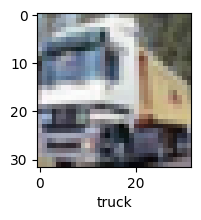

In [90]:
plot_sample(X_train,y_train,1)

### Preprocessing:Scale image

In [91]:
#we want to do normalize between 0 to 1 ramge
X_train_scaled=X_train/255
X_test_scales=X_test/255

-The to_categorical function from the Keras library is used for this purpose. It takes in the integer labels as input and converts them into a binary matrix representation, where each column corresponds to a class label and each row corresponds to a sample.

-For example, if the original label of a sample is 3, then after one-hot encoding, the corresponding row of the binary matrix would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], where the fourth element is set to 1 to indicate the class label.

In [92]:
# from tensorflow import keras
# y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
# y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [93]:
# y_train[:5]

In [94]:
# y_train_categorical[:5]

### Model Building and training


In [95]:
from tensorflow import keras
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',#if you have y_train is in simple no then use sparse categorical crossentropy and if you have y_train and y_test is in onehotencoded format use categorical crossentropy
             metrics=['accuracy'])
ann.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8178 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6251 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5404 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4812 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4311 - accuracy: 0.4951


### lets's make some prediction

In [96]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 262.1871 - accuracy: 0.3874


[262.1871337890625, 0.3874000012874603]

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification Report \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification Report 
               precision    recall  f1-score   support

           0       0.17      0.96      0.29      1000
           1       0.19      0.27      0.22      1000
           2       0.17      0.30      0.21      1000
           3       0.20      0.20      0.20      1000
           4       0.33      0.00      0.01      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.50      0.00      0.01      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.17     10000
   macro avg       0.16      0.17      0.09     10000
weighted avg       0.16      0.17      0.09     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [99]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8914 - accuracy: 0.3919
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3138 - accuracy: 0.5336
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1694 - accuracy: 0.5925
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0536 - accuracy: 0.6328
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9897 - accuracy: 0.6556
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9189 - accuracy: 0.6822
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8596 - accuracy: 0.7034
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8114 - accuracy: 0.7198
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7620 - accuracy: 0.7374
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.721

In [101]:

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1890 - accuracy: 0.6402


[1.1889550685882568, 0.6402000188827515]

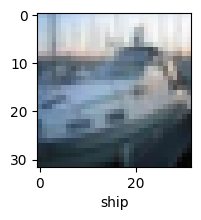

In [108]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,2)

In [103]:
y_pred= cnn.predict(X_test)
y_pred[:5]


313/313 [==============================] - 1s 2ms/step


array([[8.0193521e-04, 4.0777088e-03, 1.3897714e-03, 8.1696826e-01,
        1.1052055e-03, 3.3335559e-02, 4.0164903e-02, 1.5352120e-03,
        9.8464578e-02, 2.1568991e-03],
       [7.5703204e-02, 3.0964664e-01, 9.5448195e-07, 3.0657628e-07,
        1.6129603e-07, 8.5280163e-08, 1.3387931e-08, 1.9955454e-08,
        5.7566071e-01, 3.8987890e-02],
       [6.9361627e-02, 2.3403557e-02, 1.6544053e-03, 6.1290769e-04,
        2.3860188e-04, 9.3495328e-05, 5.3984404e-05, 3.9999606e-05,
        9.0046686e-01, 4.0745297e-03],
       [9.7529578e-01, 3.4138619e-03, 2.5132203e-03, 4.3700780e-05,
        5.5296350e-05, 6.2509316e-06, 2.8344311e-05, 1.3047369e-07,
        1.8631650e-02, 1.1747152e-05],
       [1.7088759e-04, 1.0185963e-03, 2.3519846e-02, 1.1202482e-02,
        5.5285460e-01, 7.2354986e-03, 4.0066206e-01, 1.5941141e-03,
        3.7961749e-05, 1.7040034e-03]], dtype=float32)

In [106]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [107]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [111]:
y_classes[2]

8

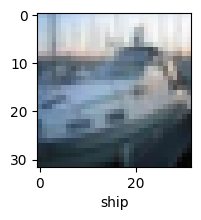

In [114]:
plot_sample(X_test,y_test,2)

In [113]:
classes[y_classes[1]]

'ship'